In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./RealEstate.csv')
df.head()

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000.0,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000.0,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000.0,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000.0,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900.0,3,1,1249,87.99,Short Sale


In [3]:
df.describe()

,MLS,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft
count,781.000000,7.810000e+02,781.000000,781.000000,781.000000,781.000000
mean,151224.550576,3.833291e+05,3.142125,2.355954,1755.058899,213.131293
std,3936.122042,3.490381e+05,0.855768,0.846596,819.577603,115.082146
min,132842.000000,2.650000e+04,0.000000,1.000000,120.000000,19.330000
25%,149922.000000,1.990000e+05,3.000000,2.000000,1218.000000,142.140000
50%,152581.000000,2.950000e+05,3.000000,2.000000,1550.000000,188.360000
75%,154167.000000,4.290000e+05,4.000000,3.000000,2032.000000,245.420000
max,154580.000000,5.499000e+06,10.000000,11.000000,6800.000000,1144.640000


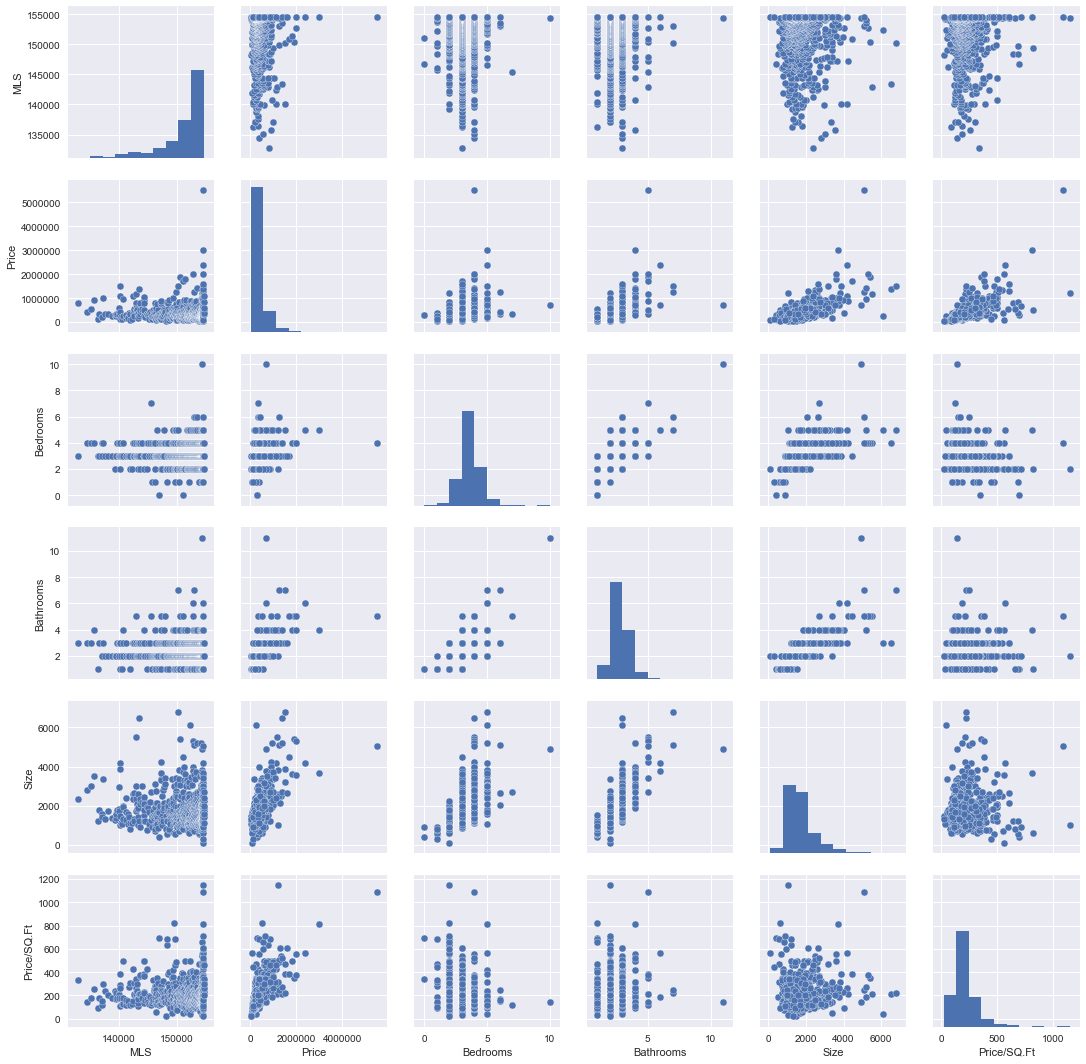

In [4]:
sns.pairplot(df)

[724.43589743589746, 956.35897435897436, 1059.948717948718, 1119.4102564102564, 1194.7948717948718, 1247.5128205128206, 1308.8205128205129, 1377.4102564102564, 1446.2051282051282, 1513.6923076923076, 1610.5897435897436, 1707.6923076923076, 1799.5897435897436, 1880.5897435897436, 1979.4102564102564, 2096.6153846153848, 2263.6410256410259, 2529.0256410256411, 3009.4102564102564, 4213.0] [39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40]
[90299.974358974359, 140112.8205128205, 161118.69230769231, 176717.41025641025, 193194.35897435897, 207025.64102564103, 227770.0, 244969.1794871795, 261493.58974358975, 283246.15384615387, 302900.0, 327176.92307692306, 355261.53846153844, 385087.1794871795, 410182.05128205131, 458135.12820512819, 530128.33333333337, 626551.15384615387, 819407.69230769225, 1438742.5] [39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40]


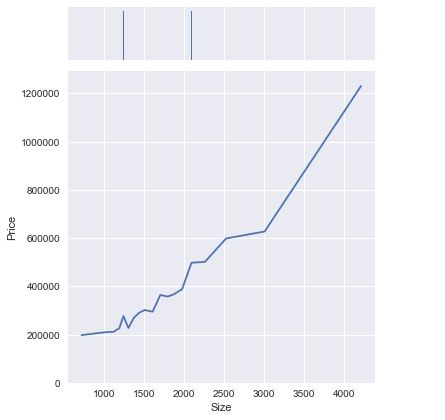

In [35]:
def _mean(X, y):
    uniques = np.unique(X)
    indices = np.argsort(X)
    X = X[indices]
    y = y[indices]
    if len(uniques) > 20:
        groups = 20
        mean_x = []
        mean_y = []
        step = int(len(X) / groups)
        for i in range(groups):
            loc = step * i
            if i + 1 == groups:
                x_group = np.mean(X[loc:])
                y_group = np.mean(y[loc:])
            else:
                x_group = np.mean(X[loc:(loc + step)])
                y_group = np.mean(y[loc:(loc + step)])
            mean_x.append(x_group)
            mean_y.append(y_group)
    else:
        mean_x = uniques
        mean_y = [np.mean(y[X == i]) for i in uniques]
    plt.plot(mean_x, mean_y)

def _mean_dist(X, **kwargs):
    uniques = np.unique(X)
    indices = np.argsort(X)
    X = X[indices]
    if len(uniques) > 20:
        groups = 20
        mean_x = []
        dist = []
        step = int(len(X) / groups)
        for i in range(groups):
            loc = step * i
            if i + 1 == groups:
                x_group = np.mean(X[loc:])
                dist_group = len(X[loc:])
            else:
                x_group = np.mean(X[loc:(loc + step)])
                dist_group = len(X[loc:(loc + step)])
            mean_x.append(x_group)
            dist.append(dist_group)
    else:
        mean_x = uniques
        dist = [np.count_nonzero(X == i) for i in uniques]
    print(mean_x, dist)
    plt.bar(mean_x, dist)

def continuous_over_target(df, x, y):
    g = sns.JointGrid(x=x, y=y, data=df)
    g.plot_joint(_mean)
    g.plot_marginals(_mean_dist)
    g.ax_marg_y.set_axis_off()
    
continuous_over_target(df, 'Size', 'Price')

In [ ]:
bathrooms = df['Bathrooms'].values
len(df['Price'].values[bathrooms == 11])